In [19]:
import math
import csv
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [20]:
sim = rebound.Simulation("sim_bins/cas_ss.bin")
sim.particles[-1].m = 2.873e-27
sim.move_to_com()

In [21]:
date2 = "1998-04-30 13:00" #April 26
date3 = "1999-06-25 13:00" #June 24
#date3x4 = "1999-07-08 13:00" #July 
date4 = "1999-08-19 13:00" #August 18
date5 = "2000-01-24 13:00" #January 23
date6 = "2000-12-31 13:00" #December 30
date7 = "2002-06-30 13:00" #July 23
date8 = "2004-06-02 13:00" #July 1

time12 = 193 #205 #193

time23= 424#340 #424
time34= 55 #55
time45= 158 #158
time56= 342 #332 #342
time67= 1500 #570
time78= 709 #709

dates = [date2, date3, date4, date5, date6, date7, date8]
times = [time23, time34, time45, time56, time67, time78]

In [22]:
def velocity_calc():
    vx = sim.particles[-1].vx *10
    vy = sim.particles[-1].vy *10
    vz = sim.particles[-1].vz * 10
    vtot = 3* math.sqrt((vx**2)+(vy**2)+(vz**2))
    return vtot

In [23]:
vdata = []
time_data = []

In [24]:
days = 0
for j in range(time12):
    sim.step()
    new_v = velocity_calc()
    vdata.append(new_v)
    days +=1
    time_data.append(days)
    
    

index1 = 5
for k in range(index1):
    chosen_date = dates[k]
    chosen_time = times[k] 
    
    print(chosen_date, chosen_time)


    sim.remove(index=9)
    sim.add("Cassini",date=chosen_date)
    sim.particles[-1].m = 2.873e-27
    sim.dt = sim.particles[3].a/365.

    for i in range(chosen_time):
        sim.step()
        new_v = velocity_calc()
        vdata.append(new_v)
        days +=1
        time_data.append(days)

1998-04-30 13:00 424
Searching NASA Horizons for 'Cassini'... Found: Cassini (spacecraft) (-82).
1999-06-25 13:00 55
Searching NASA Horizons for 'Cassini'... Found: Cassini (spacecraft) (-82).
1999-08-19 13:00 158
Searching NASA Horizons for 'Cassini'... Found: Cassini (spacecraft) (-82).
2000-01-24 13:00 342
Searching NASA Horizons for 'Cassini'... Found: Cassini (spacecraft) (-82).
2000-12-31 13:00 1500
Searching NASA Horizons for 'Cassini'... Found: Cassini (spacecraft) (-82).


Text(0, 0.5, 'Speed (km/s)')

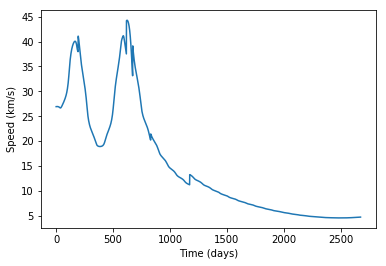

In [26]:
plt.plot(time_data, vdata)
plt.xlabel("Time (days)")
plt.ylabel("Speed (km/s)")

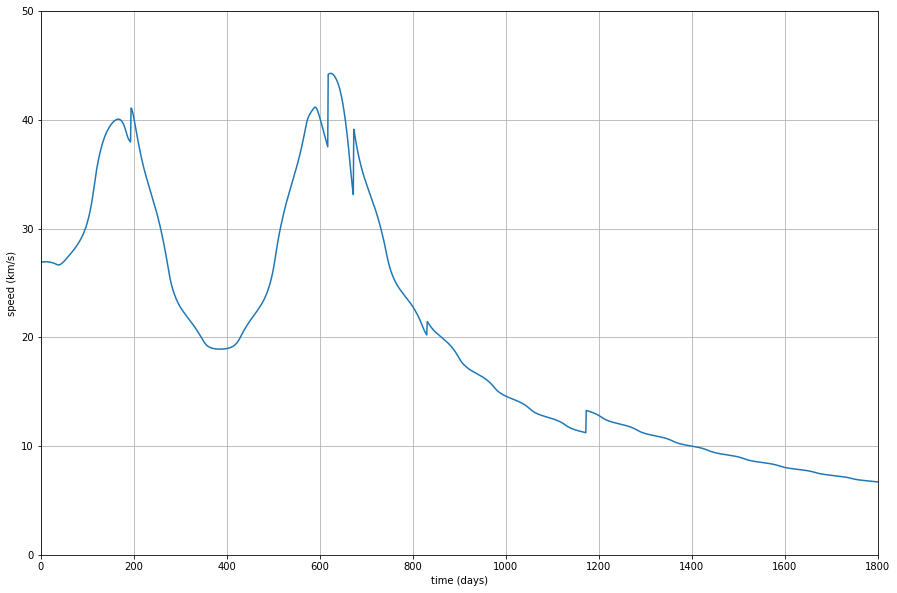

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(time_data, vdata)

ax.set(xlabel='time (days)', ylabel='speed (km/s)')
ax.grid()
ax.set_xlim([0.,1800])
ax.set_ylim([0.,50.])
fig.savefig("cas_speed.png")
plt.show()